# Data Analyses and Visualization



In [195]:
# Import packages
import copy
import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL



In [196]:
# Import prepared datasets
precip_flat = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\precip_flat.csv')
precip_multi = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\precip_multi.csv')
unique_stations = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\unique_stations.csv')
unique_basins = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\unique_basins.csv')
unique_basins.head()


,Region,Basin Name
0,Cape Cod and Islands,CAPE COD
1,Cape Cod and Islands,ISLANDS
2,Central,BLACKSTONE
3,Central,CHICOPEE
4,Central,FRENCH


## Stations over time

In [197]:
# Set visual choices.
sns.set(font_scale=2)
sns.set_theme(style="ticks", palette=None)


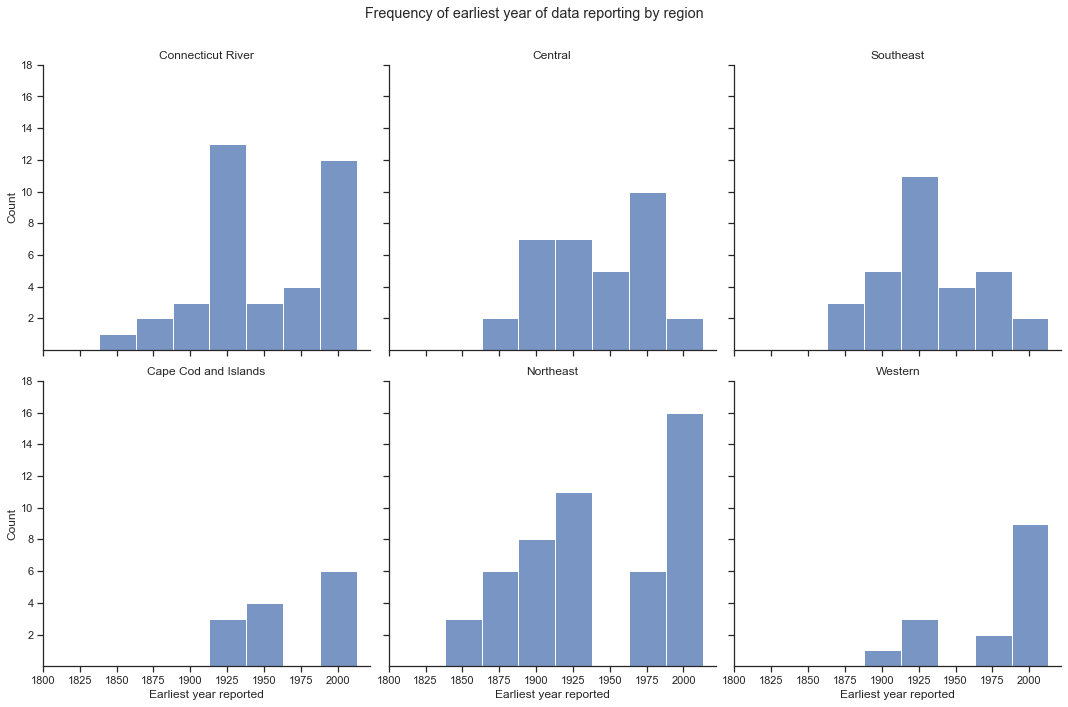

In [198]:
# Plot Frequency of earliest year of data collection by region
first_year_plot = sns.displot(data=unique_stations, 
                kind='hist',
                x="First_year_collected", 
                col="Region",
                col_wrap=3,
                binwidth=25
                )

first_year_plot.set_axis_labels("Earliest year reported")
first_year_plot.set_titles("{col_name}")

first_year_plot.set(xticks=range(1800,2025,25), yticks=[2, 4, 6, 8, 10, 12, 14, 16, 18])

first_year_plot.fig.subplots_adjust(top=.9)
first_year_plot.fig.suptitle("Frequency of earliest year of data reporting by region")

# plt.show()
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/Frequency-earliest-year-by-region.png')


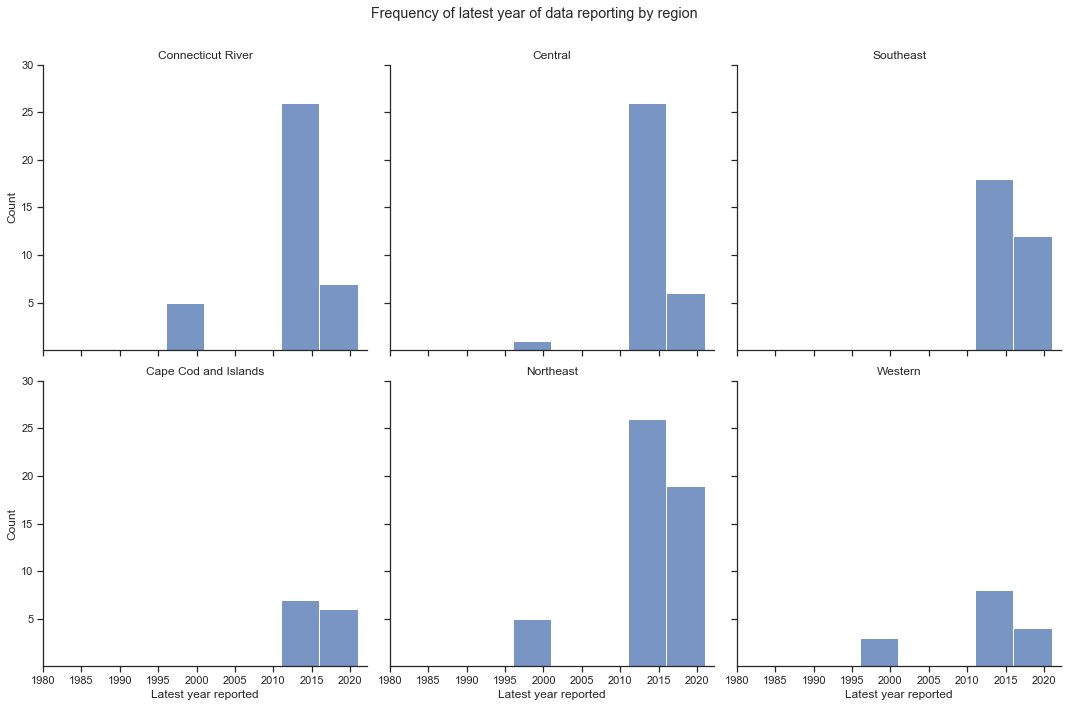

In [199]:
# Plot Frequency of earliest year of data collection by region
last_year_plot = sns.displot(data=unique_stations, 
                kind='hist',
                x="Last_year_collected", 
                col="Region",
                col_wrap=3,
                binwidth=5
                )

last_year_plot.set_axis_labels("Latest year reported")
last_year_plot.set_titles("{col_name}")

last_year_plot.set(xticks=range(1980,2025,5), yticks=[5, 10, 15, 20, 25, 30])

last_year_plot.fig.subplots_adjust(top=.9)
last_year_plot.fig.suptitle("Frequency of latest year of data reporting by region")

#plt.show()
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/Frequency-latest-year-by-region.png')


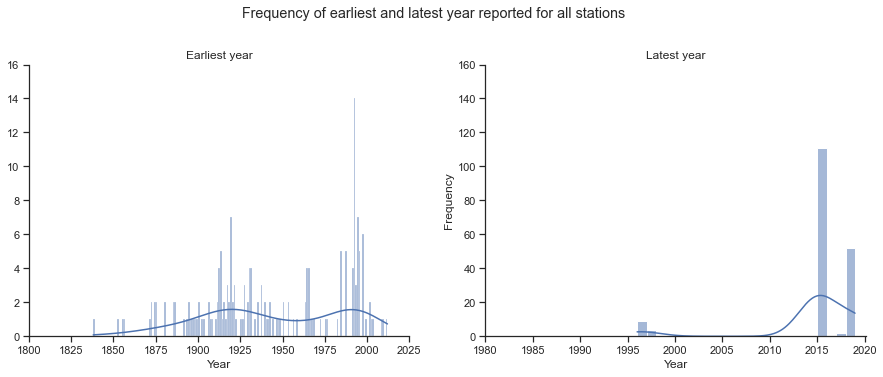

In [200]:
# Plot frequency of latest year reported for all stations
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(ax=axes[1], 
             data=unique_stations,
             x="Last_year_collected",
             binwidth=1,
             kde=True
            )

axes[1].set(xticks=range(1980,2025,5), yticks=range(0,180,20))
axes[1].set(xlabel="Year", ylabel="Frequency", title="Latest year")

sns.histplot(ax=axes[0],
             data=unique_stations,
             x="First_year_collected",
             binwidth=1,
             kde=True
            )

axes[0].set(xticks=range(1800,2050,25), yticks=range(0,18,2))
axes[0].set(xlabel="Year", ylabel="", title="Earliest year")

fig.suptitle("Frequency of earliest and latest year reported for all stations", y=1.04)

sns.despine()

#plt.show()
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/Frequency-year-by-station.png')


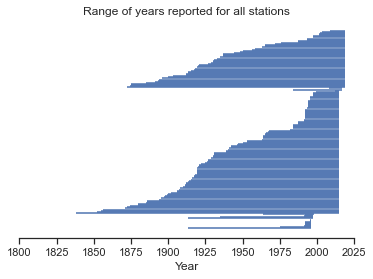

<Figure size 432x288 with 0 Axes>

In [201]:
# Plot earliest and latest data reporting date for each station.
n_stations = len(unique_stations) + 1 # This needs the plus one to work. Do not remove.
unique_stations = unique_stations.sort_values(by=['Last_year_collected', 'First_year_collected']) # Sorting makes it pretty.

g = plt.hlines(range(1,n_stations), unique_stations['First_year_collected'], unique_stations['Last_year_collected'])

g.axes.get_yaxis().set_ticks([]) # Hide y-axis ticks.
plt.xlim(1800,2025)
plt.xlabel("Year")
plt.title("Range of years reported for all stations")

sns.despine(left=True)

plt.show()
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/Range-years-by-station.png')


## LYN614 Exploration


In [202]:
lynn_data_30yr = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\lynn_data_30yr.csv')
lynn_data_30yr.head()


,Station,Year,Month,Precipitation
0,LYN614,1990,1,1.40
1,LYN614,1990,2,4.03
2,LYN614,1990,3,0.86
3,LYN614,1990,4,3.36
4,LYN614,1990,5,4.17


In [203]:
lynn_list = list(lynn_data_30yr['Precipitation'])
lynn_data_30yr_1d = pd.DataFrame(lynn_list, columns=['Precipitation'], index=pd.date_range("1-1-1990", periods=len(lynn_data_30yr), freq="M"))
lynn_data_30yr_1d = lynn_data_30yr_1d.dropna()
lynn_data_30yr_1d.head()


,Precipitation
1990-01-31,1.40
1990-02-28,4.03
1990-03-31,0.86
1990-04-30,3.36
1990-05-31,4.17


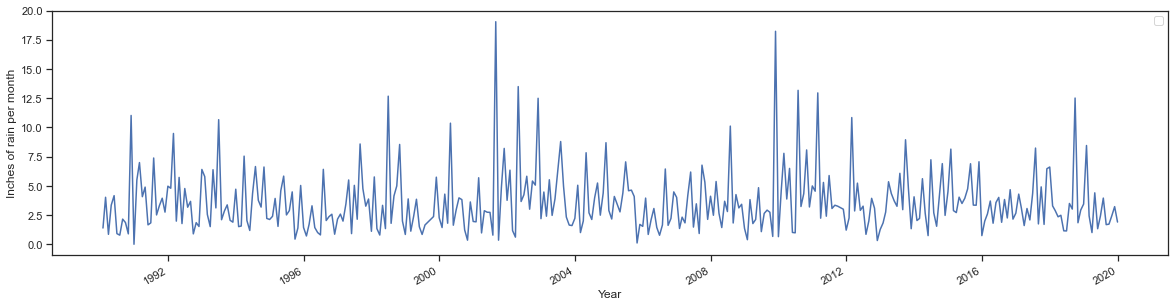

In [204]:
lynn_data_30yr_1d.plot(figsize=(20,5), xlabel="Year", ylabel="Inches of rain per month")
plt.legend([''],[])
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/LYN614-Precipitation-per-year.png')


In [205]:
# See https://www.statsmodels.org/v0.12.0/_modules/statsmodels/tsa/seasonal.html.
# seasonal_decompose requires the arguement 'extrapolate_trend='freq'' to return residual and trend values.
st_decomp = seasonal_decompose(lynn_data_30yr_1d, period = 12, extrapolate_trend='freq')


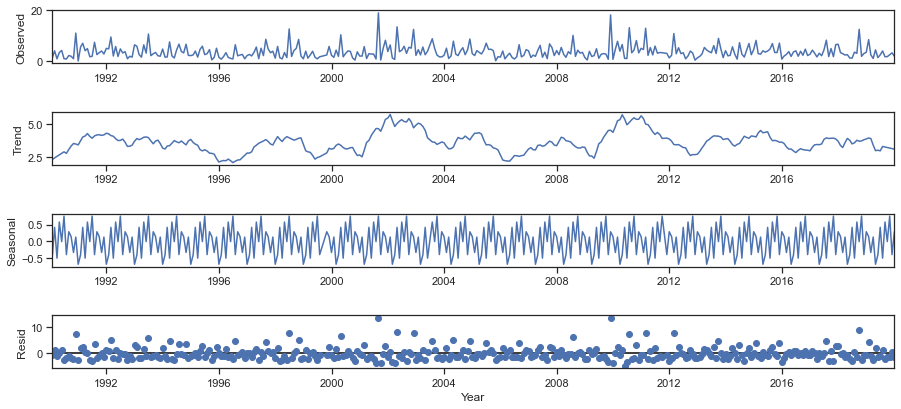

In [213]:
fig = st_decomp.plot()
fig.set_size_inches((14,6))
fig.axes[0].set_ylabel('Observed')
plt.xlabel('Year')

plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/LYN614-Seasonal-decomposition.png')


In [207]:
#fig.axes[0].set_xlabel('test')
fig.axes

[<AxesSubplot:ylabel='Observed'>,
 <AxesSubplot:ylabel='Trend'>,
 <AxesSubplot:ylabel='Seasonal'>,
 <AxesSubplot:xlabel='Year', ylabel='Resid'>]

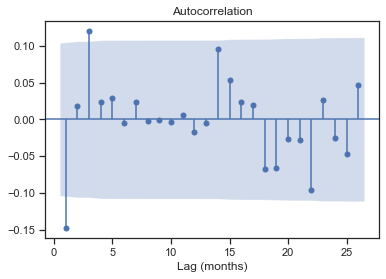

In [215]:
ACF_plot = plot_acf(lynn_data_30yr_1d, alpha=0.05, zero=False)
plt.xlabel('Lag (months)')
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/LYN614-Autocorrelation-plot.png')

# small obs: The following month is negatively-correlated while data three months out is positively-correlated. 
# Does the 3-month lag have to do with 3-month seasonality (which is waaay more prominent in MA than anywhere else I've lived?)

# another small obs: seasonality apparent given the occilation around y = 0, with larger non-sig oscillations 
# occuring approx. one to two years (but not 12 and 24 months) out from the period of interest. 
# Is this the effects of El Niño?

In [209]:
ax.plot([1, 2, 3], label='Inline label')
plt.set_label
ax.legend()

NameError: name 'ax' is not defined